In [4]:
import time
import os
import datetime
import operator
import math
import random
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import pickle
import gc
import json

# check your tqdm version if import fails
from tqdm.notebook import tqdm

import sys
import scoring

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set()
%matplotlib inline
%config InlineBackend.close_figures=True
from IPython.display import display, Markdown, HTML

In [5]:


# import mlflow
# import homeml
# from mlflow.models.signature import infer_signature

# MLFLOW_APP_NAME = "UIT_NT2211.CH180_Final Project"
# MLFLOW_TAGS  = {
#     "Version":"0.0.1",
#     "Describe":"Network Intrusion Detection"
# }

# MLFLOW_TRACKING_URI
# EXPERIMENT_NAME = "Network Intrusion Detection"
# mlflow.set_tracking_uri()
# mlflow.set_experiment(EXPERIMENT_NAME)

# # Helper function to log experiment results
# def log_experiment(experiment_name, model, params, metrics, artifacts=None):
#     """
#     Log an experiment to MLflow
    
#     Args:
#         experiment_name: Name/description of the experiment
#         model: Trained model object
#         params: Dictionary of parameters
#         metrics: Dictionary of metrics
#         artifacts: Dictionary of paths to artifact files/folders
#     """
#     with mlflow.start_run(run_name=experiment_name):
#         # Log parameters
#         mlflow.log_params(params)
        
#         # Log metrics
#         mlflow.log_metrics(metrics)
        
#         # Log model
#         mlflow.lightgbm.log_model(model, "model")
        
#         # Log artifacts if provided
#         if artifacts:
#             for name, path in artifacts.items():
#                 mlflow.log_artifact(path)
        
#         # Log experiment tags
#         mlflow.set_tags({
#             "experiment_name": experiment_name,
#             "model_type": "LightGBM",
#             "problem_type": "multiclass_classification"
#         })

In [7]:
currentPath = os.getcwd()
output_folder = currentPath + '/final_project/documentation'
subfolders = [
    'performance',
    'predictors',
    'analysis',
    'model',
    'nan_share',
]

os.makedirs(output_folder, exist_ok=True)

for folder in subfolders:
    os.makedirs(os.path.join(output_folder, folder), exist_ok=True)

In [8]:
train_data_path = currentPath + '/final_project/data/train.csv'
data = pd.read_csv(train_data_path)
data = data.set_index('ID')
data.head()

,flow_duration,Header_Length,Protocol type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Label
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
769866,0.000000,54.00,6.00,64.00,2.890680,2.890680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,54.0,54.00,54.000000,NaN,54.00,8.294698e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
1859874,0.000892,54.58,NaN,64.00,28.594443,28.594443,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.01,0.00,0.01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,NaN,54.00,54.000000,0.000000,54.00,8.297298e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
396092,0.000000,0.00,1.00,64.00,23.716061,23.716061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,NaN,NaN,8.312478e+07,9.5,9.165151,0.000000,NaN,0.00,141.55,DDoS-ICMP_Flood
179708,109.146727,1992.80,8.20,50.10,41.102103,41.102103,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.20,0.00,7.80,14.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2972.90,54.0,1243.40,190.553838,305.527954,223.00,NaN,13.5,19.438032,433.145956,98347.063168,1.00,244.60,Recon-PortScan
1527289,0.025221,58.53,5.95,65.91,25.300629,25.300629,NaN,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.97,0.04,0.97,0.01,0.05,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,572.88,54.0,59.24,54.303525,1.158718,56.76,8.334493e+07,9.5,10.420536,1.657137,61.278209,0.04,141.55,DDoS-RSTFINFlood


In [9]:
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 1950138
Number of columns: 47


In [10]:
data.duplicated().sum()

189

In [11]:
data = data.drop_duplicates()

In [12]:
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 1949949
Number of columns: 47


In [13]:
data.dtypes

flow_duration      float64
Header_Length      float64
Protocol type      float64
Duration           float64
Rate               float64
Srate              float64
Drate              float64
fin_flag_number    float64
syn_flag_number    float64
rst_flag_number    float64
psh_flag_number    float64
ack_flag_number    float64
ece_flag_number    float64
cwr_flag_number    float64
ack_count          float64
syn_count          float64
fin_count          float64
urg_count          float64
rst_count          float64
HTTP               float64
HTTPS              float64
DNS                float64
Telnet             float64
SMTP               float64
SSH                float64
IRC                float64
TCP                float64
UDP                float64
DHCP               float64
ARP                float64
ICMP               float64
IPv                float64
LLC                float64
Tot sum            float64
Min                float64
Max                float64
AVG                float64
S

In [14]:
from scoring.data_exploration import metadata_table

dq_missing_distinct_features = metadata_table(data)

In [15]:
dq_missing_distinct_features

,name,type,nunique,value examples,fill pct
0,flow_duration,float64,1291511,"0.0, 0.000891830921173, 109.14672684669496, 0....",100.000000
1,Header_Length,float64,658743,"54.0, 54.58, 0.0, 1992.8, 58.53, 74.52, 204.0,...",89.999431
2,Protocol type,float64,4668,"6.0, nan, 1.0, 8.2, 5.95, 16.89, 6.44, 1.04, 7...",89.999277
3,Duration,float64,12353,"64.0, 50.1, 65.91, 70.9, nan, 112.4, 65.22, 66...",89.999174
4,Rate,float64,1574314,"2.890679715363808, 28.594443481525985, 23.7160...",90.001123
5,Srate,float64,1574081,"2.890679715363808, 28.594443481525985, 23.7160...",90.000764
6,Drate,float64,62,"0.0, nan, 0.0080355402880144, 0.00830214010386...",89.999328
7,fin_flag_number,float64,2,"0.0, 1.0",100.000000
8,syn_flag_number,float64,2,"0.0, 1.0",100.000000
9,rst_flag_number,float64,2,"0.0, 1.0",89.999226


In [16]:
dq_missing_distinct_features.to_csv(currentPath + '/final_project/documentation/nan_share/dq_missing_distinct_features.csv', index=False)

In [17]:
col_target = 'Label'
cols_pred = [
    'flow_duration', 'Header_Length', 'Protocol type', 'Duration', 'Rate',
    'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
    'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
    'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
    'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
    'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
    'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'
]

In [18]:
# Most of the predictors have fill percentage >= 90% => Impute missing value with median
for feat in tqdm([col for col in data.columns if col != col_target]):
    median_value = data[feat].median()
    data[feat] = data[feat].fillna(median_value)

  0%|          | 0/46 [00:00<?, ?it/s]

In [19]:
n_classes = len(data[col_target].unique())
n_classes

34

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data[col_target] = label_encoder.fit_transform(data[col_target]).astype(float)

In [21]:
descrip = data.describe(include='all').transpose()
descrip.fillna('').to_csv(currentPath + '/final_project/documentation/analysis/descrip.csv')

In [22]:
from scoring.data_manipulation import data_sample_split

col_datatype = 'data_type'

data[col_datatype] = data_sample_split(
    data,
    sample_sizes = [0.6, 0.2, 0.2],
    sample_names = ['train', 'valid', 'test'],
    stratify_by_columns = [col_target]

)

train   1,169,969 rows
valid   389,990 rows
test    389,990 rows


In [23]:
train_mask = (data[col_datatype] == 'train')
valid_mask = (data[col_datatype] == 'valid')
test_mask = (data[col_datatype] == 'test')

In [24]:
col_weight = 'WEIGHT'
data[col_weight] = 1

# Hyperparameter tuning

In [ ]:
# param_grid = {
#     'num_leaves': [31, 50, 100],
#     'max_depth': [5, 10, 15],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'min_child_samples': [20, 30, 50],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [0, 0.1, 0.5],
# }

# base_params = {
#     'objective': 'multiclass',
#     'num_class': n_classes,
#     'metric': 'multi_logloss',
#     'class_weight': 'balanced',
#     'random_state': 42
# }

# base_clf = lightgbm.LGBMClassifier(**base_params)

# search = RandomizedSearchCV(
#     estimator=base_clf,
#     param_distributions=param_grid,
#     n_iter=20,
#     scoring='roc_auc_ovr',
#     cv=2,
#     random_state=42,
#     n_jobs=-1,
#     verbose=0
# )

# search.fit(data[train_mask][cols_pred], data[train_mask][col_target])
# search.best_params_ = {'num_leaves': 100, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}

In [ ]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

def objective(trial):
    param = {
        'objective': 'multiclass',
        'num_class': n_classes,
        'metric': 'multi_logloss',
        'class_weight': 'balanced',
        'random_state': 42,
        'num_leaves': trial.suggest_int('num_leaves', 31, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.5),
    }

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        data[train_mask][cols_pred], 
        data[train_mask][col_target], 
        test_size=0.2, 
        random_state=42
    )

    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    gbm = lgb.train(param, dtrain, valid_sets=[dval], callbacks=[lgb.early_stopping(50)])

    preds_prob = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    preds = np.argmax(preds_prob, axis=1)

    score = roc_auc_score(y_val, preds_prob, multi_class='ovr')
    return score

In [ ]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)
# study.best_trial.params = {
#     'num_leaves': 57,
#      'max_depth': 15,
#      'learning_rate': 0.0325910290577597,
#      'n_estimators': 121,
#      'min_child_samples': 35,
#      'subsample': 0.7471576379643576,
#      'colsample_bytree': 0.992128327844153,
#      'reg_alpha': 0.06655512513408313,
#      'reg_lambda': 0.38025224602450136
# }

In [ ]:
# final params after tuning hyperparameters
params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'metric': 'multi_logloss',
    'num_leaves': 57,
    'max_depth': 15,
    'learning_rate': 0.0325910290577597,
    'n_estimators': 121,
    'min_child_samples': 35,
    'subsample': 0.7471576379643576,
    'colsample_bytree': 0.992128327844153,
    'reg_alpha': 0.06655512513408313,
    'reg_lambda': 0.38025224602450136,
    'verbosity': -1,
    'seed': 1234,
}

# Experiment 1:  Train model with all predictors, using optimized hyperparameters learned from previous tuning process

In [ ]:
import sys  
sys.path.insert(1, currentPath + '/final_project/src')

import lgbm

model_lgb = lgbm.LGBM_model(cols_pred, params, use_CV=False, CV_seed=9876)

In [ ]:
model1 = model_lgb.fit(
    X_train=data[train_mask],
    X_valid=data[valid_mask],
    y_train=data[train_mask][col_target],
    y_valid=data[valid_mask][col_target],
    w_train=data[train_mask][col_weight],
    w_valid=data[valid_mask][col_weight],
    show_plots=False,
    verbose_level=-1,
)

In [ ]:
var_imp = model_lgb.plot_imp(
    model1, "importance_gain", show_plots=True, n_predictors=25
)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report)

In [35]:
def model_evaluation(y_true, y_pred, label_encoder, figsize=(15, 12)):
    """
    Evaluate model performance with multiple metrics and visualizations
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    label_encoder : LabelEncoder
        Fitted label encoder to get original class names
    figsize : tuple, optional
        Figure size for confusion matrix plot (default: (15, 12))
    
    Returns:
    --------
    dict
        Dictionary containing all evaluation metrics
    """
    # Get original class labels
    label_names = label_encoder.classes_
    
    # Calculate basic metrics
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision_macro': precision_score(y_true, y_pred, average='macro'),
        'recall_macro': recall_score(y_true, y_pred, average='macro'),
        'f1_macro': f1_score(y_true, y_pred, average='macro')
    }
    
    # Print basic metrics
    print("Model Performance Metrics:")
    print("-" * 50)
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.3f}")
    print("-" * 50)
    
    # Generate and plot confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cnf_matrix, 
                annot=True, 
                fmt='d',
                cmap='Blues',
                xticklabels=label_names,
                yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Generate classification report
    print("\nDetailed Classification Report:")
    print("-" * 50)
    report = classification_report(y_true, y_pred, 
                                 target_names=label_names,
                                 digits=3)
    print(report)
    
    # Create DataFrame version of classification report
    report_dict = classification_report(y_true, y_pred, 
                                      target_names=label_names,
                                      output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    # Store all results in dictionary
    results = {
        'basic_metrics': metrics,
        'confusion_matrix': cnf_matrix,
        'classification_report': report_df,
        'classification_report_text': report
    }
    
    return results

In [ ]:
X_test = data[test_mask][cols_pred]
y_test = data[test_mask][col_target]

y_test_pred = model_lgb.predict(X_test)

results = model_evaluation(y_test, y_test_pred, label_encoder)

In [ ]:
label_names = label_encoder.classes_
confusion_matrix_df = pd.DataFrame(results['confusion_matrix'], columns=label_names, index=label_names)

In [ ]:
var_imp_shap = model_lgb.print_shap_values(
    data[train_mask],
    data[valid_mask],
    data[train_mask][col_target],
    data[valid_mask][col_target],
    set_to_shap=data[test_mask],
    w_train=data[train_mask][col_weight],
    w_valid=data[valid_mask][col_weight],
)

In [ ]:
imp_df = var_imp.merge(
    var_imp_shap,
    on='Feature',
    how='inner'
)
imp_df

In [ ]:
n_selected_predictors = 15
nlargest_gain = imp_df.nlargest(n_selected_predictors, 'importance_gain')['Feature'].tolist()
nlargest_shap = imp_df.nlargest(n_selected_predictors, 'Shap_importance')['Feature'].tolist()

selected_predictors = list(set(nlargest_gain) & set(nlargest_shap))
print('Selected', len(selected_predictors), 'predictors')
selected_predictors

In [ ]:
selected_predictors = [
    'AVG',
    'Number',
    'IAT',
    'flow_duration',
    'Header_Length',
    'fin_count',
    'syn_flag_number',
    'rst_count',
    'Protocol type'
]

In [ ]:
data[selected_predictors]

In [ ]:
# experiment_name = "Experiment_1"

# metrics = {
#     "accuracy": results['basic_metrics']['accuracy'],
#     "precision_macro": results['basic_metrics']['precision_macro'],
#     "recall_macro": results['basic_metrics']['recall_macro'],
#     "f1_macro": results['basic_metrics']['f1_macro']
# }

# artifacts = {
#     "confusion_matrix": "/confusion_matrix.png",
#     "feature_importance": "/feature_importance.png"
# }

# log_experiment(
#     experiment_name=experiment_name,
#     model=model,
#     params=params,
#     metrics=metrics,
#     artifacts=artifacts
# )

# Experiment 2: Train model with selected 9 predictors

In [ ]:
import sys  
sys.path.insert(1, currentPath + '/final_project/src')

import lgbm

params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'metric': 'multi_logloss',
    'num_leaves': 57,
    'max_depth': 15,
    'learning_rate': 0.0325910290577597,
    'n_estimators': 121,
    'min_child_samples': 35,
    'subsample': 0.7471576379643576,
    'colsample_bytree': 0.992128327844153,
    'reg_alpha': 0.06655512513408313,
    'reg_lambda': 0.38025224602450136,
    'verbosity': -1,
    'seed': 1234,
}

model_lgb = lgbm.LGBM_model(selected_predictors, params, use_CV=False, CV_seed=9876)

In [ ]:
model1 = model_lgb.fit(
    X_train=data[train_mask][selected_predictors],
    X_valid=data[valid_mask][selected_predictors],
    y_train=data[train_mask][col_target],
    y_valid=data[valid_mask][col_target],
    w_train=data[train_mask][col_weight],
    w_valid=data[valid_mask][col_weight],
    show_plots=False,
    verbose_level=-1,
)

In [ ]:
X_test = data[test_mask][selected_predictors]
y_test = data[test_mask][col_target]

y_test_pred = model_lgb.predict(X_test)

results = model_evaluation(y_test, y_test_pred, label_encoder)

## Before and after feature selection comparision

**After feature selection:**
1. Performance drop:
    - There's a relatively small decrease in overall performance despite reducing features by 80% (from 46 to 9)
    - The accuracy dropped by only 1.3% (93.6% to 92.3%)
    - The model maintains strong performance for most attack types
2. Class-specific Changes:
    - Most Affected Classes (Negative Impact):
        - CommandInjection: F1-score dropped from 0.436 to 0.314
        - Uploading_Attack: F1-score dropped from 0.155 to 0.067
        - BrowserHijacking: F1-score dropped from 0.651 to 0.574
        - DNS_Spoofing: F1-score dropped from 0.769 to 0.714
    - Well-Maintained Performance:
        - DDoS attacks (all variants) maintained excellent performance (F1 > 0.95)
        - Mirai attacks stayed strong with F1-scores > 0.98
        - DoS attacks remained highly accurate with minimal degradation
    - Class Imbalance Impact:
        - Rare classes (like Uploading_Attack, XSS, Backdoor_Malware) continue to show poor performance
        - Common attack types maintain high performance even with fewer features
        - The weighted average metrics remain high due to good performance on majority classes
    
=> 80% reduction in features resulted in only ~2% performance degradation. This suggests significant computational efficiency gains with acceptable performance trade-off

## Error Analysis
Classes with Poor Performance (F1-score < 0.4):
1. Uploading_Attack
    - Extremely low recall (0.040) indicates the model misses 96% of actual upload attacks
    - Very small support (175 samples) suggests class imbalance issue
    - High false negative rate makes this attack type particularly dangerous
2. XSS (Cross-Site Scripting)
    - Only detects 12.1% of actual XSS attacks
    - Low precision (0.290) indicates high false positive rate
    - Also suffers from class imbalance with only 538 samples
3. CommandInjection
    - Misses about 76% of actual command injection attacks
    - Moderate precision but poor recall suggests conservative prediction
    - Relatively small sample size (764)
4. Backdoor_Malware
    - Only detects 17.3% of actual backdoor malware
    - Low sample count (450) contributing to poor performance
    - False negatives are particularly concerning for this attack type
5. Recon-PingSweep
    - Very low recall indicates most ping sweep reconnaissance goes undetected
    - Small sample size (326) but relatively better precision

In [ ]:
# experiment_name = "Experiment_2"

# metrics = {
#     "accuracy": results['basic_metrics']['accuracy'],
#     "precision_macro": results['basic_metrics']['precision_macro'],
#     "recall_macro": results['basic_metrics']['recall_macro'],
#     "f1_macro": results['basic_metrics']['f1_macro']
# }

# artifacts = {
#     "confusion_matrix": "/confusion_matrix.png",
#     "feature_importance": "/feature_importance.png"
# }

# log_experiment(
#     experiment_name=experiment_name,
#     model=model,
#     params=params,
#     metrics=metrics,
#     artifacts=artifacts
# )

# Experiment 3: Improve the model performance focusing on the problematic classes

## Feature Engineering

In [ ]:
data[selected_predictors]

In [ ]:
from scipy import stats

# Helper function to safely compute ratios
def safe_divide(a, b):
    return np.divide(a, b, out=np.zeros_like(a), where=b!=0)

# --- New Feature Group 1: Traffic Pattern Indicators ---
# Ratio features with safety checks
data['header_payload_ratio'] = safe_divide(data['Header_Length'], data['AVG'])
data['header_payload_ratio'] = data['header_payload_ratio'].clip(lower=0, upper=data['header_payload_ratio'].quantile(0.99))

data['flag_intensity'] = safe_divide(
    (data['fin_count'] + data['syn_flag_number'] + data['rst_count']),
    data['Number']
)
data['flag_intensity'] = data['flag_intensity'].clip(lower=0, upper=data['flag_intensity'].quantile(0.99))

# --- New Feature Group 2: Statistical Features ---
# Rolling statistics with proper handling of NaN values
window_size = 10
data['iat_rolling_std'] = data.groupby('Protocol type')['IAT'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).std().fillna(x.std())
)

# --- New Feature Group 3: Interaction Features ---
# Flow intensity with safety checks
data['flow_intensity'] = safe_divide(data['Number'], data['flow_duration'])
data['flow_intensity'] = data['flow_intensity'].clip(lower=0, upper=data['flow_intensity'].quantile(0.99))

# Z-score features with outlier capping
def safe_zscore(series):
    z = stats.zscore(series, nan_policy='omit')
    return np.clip(z, -3, 3)  # Clip at ±3 standard deviations

data['avg_zscore'] = safe_zscore(data['AVG'])
data['iat_zscore'] = safe_zscore(data['IAT'])

In [ ]:
new_features = [
    'header_payload_ratio',
    'flag_intensity',
    'iat_rolling_std',
    'flow_intensity',
    'avg_zscore',
    'iat_zscore'
]
selected_predictors.extend(new_features)

In [ ]:
for feat in tqdm([col for col in selected_predictors if col != col_target]):
    median_value = data[feat].median()
    data[feat] = data[feat].fillna(median_value)

## Handle Class Imbalance

In [ ]:
data[selected_predictors+['Label']]

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
# Define sampling strategy based on tiers
def get_sampling_strategy(class_counts):
    sampling_strategy = {}
    for class_id, count in class_counts.items():
        if count < 3000:  # Very minor classes
            sampling_strategy[class_id] = 5000
        elif count < 10000:  # Minor classes
            sampling_strategy[class_id] = 10000
    return sampling_strategy

# Apply SMOTE
sampling_strategy = get_sampling_strategy(class_counts)

smote = SMOTE(
    sampling_strategy=sampling_strategy,
    random_state=42,
    k_neighbors=min(5, min(class_counts.values())-1)
)

In [ ]:
X_train = data[train_mask][selected_predictors]
y_train = data[train_mask][col_target]

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# 2. Convert class weights to sample weights
def calculate_sample_weights(y, class_weight_dict=None):
    if class_weight_dict is None:
        # Calculate balanced weights
        class_counts = Counter(y)
        total_samples = len(y)
        n_classes = len(class_counts)
        class_weight_dict = {
            class_id: total_samples / (n_classes * count)
            for class_id, count in class_counts.items()
        }
    
    sample_weights = np.ones(len(y))
    for idx, y_i in enumerate(y):
        sample_weights[idx] = class_weight_dict[y_i]
    
    return sample_weights

# Calculate sample weights for both training and validation sets
w_train = calculate_sample_weights(y_train_resampled)
w_valid = calculate_sample_weights(data[valid_mask][col_target])

In [ ]:
params = {
    'objective': 'multiclass',
    'num_class': 34,
    'metric': 'multi_logloss',
    'num_leaves': 57,
    'max_depth': 15,
    'learning_rate': 0.0325910290577597,
    'n_estimators': 121,
    'min_child_samples': 35,
    'subsample': 0.7471576379643576,
    'colsample_bytree': 0.992128327844153,
    'reg_alpha': 0.06655512513408313,
    'reg_lambda': 0.38025224602450136,
    'verbosity': -1,
    'seed': 1234
}

model_lgb = lgbm.LGBM_model(selected_predictors, params, use_CV=False, CV_seed=9876)
model1 = model_lgb.fit(
    X_train=X_train_resampled,
    X_valid=data[valid_mask][selected_predictors],
    y_train=y_train_resampled,
    y_valid=data[valid_mask][col_target],
    w_train=w_train,
    w_valid=w_valid,
    show_plots=False,
    verbose_level=-1,
)

In [ ]:
X_test = data[test_mask][selected_predictors]
y_test = data[test_mask][col_target]

y_test_pred = model_lgb.predict(X_test)

results = model_evaluation(y_test, y_test_pred, label_encoder)

## Impact Analysis
1. Significant Recall Improvements for minority classes:
    - Backdoor_Malware:   0.173 → 0.476 (+0.303)
    - BrowserHijacking:   0.452 → 0.601 (+0.149)
    - CommandInjection:   0.242 → 0.537 (+0.295)
    - SqlInjection:       0.267 → 0.685 (+0.418)
    - Uploading_Attack:   0.040 → 0.394 (+0.354)
    - XSS:                0.121 → 0.448 (+0.327)

2. Precision Trade-offs for the same classes:
    - Backdoor_Malware:   0.402 → 0.175 (-0.227)
    - BrowserHijacking:   0.786 → 0.175 (-0.611)
    - SqlInjection:       0.599 → 0.149 (-0.450)
    - Uploading_Attack:   0.206 → 0.050 (-0.156)
    - XSS:                0.290 → 0.129 (-0.161)

3. Maintained Strong Performance for majority classes:
    - All DDoS variants maintained F1-scores > 0.95
    - DoS attacks remained stable with minimal changes
    - Mirai attacks continued strong performance

# Key Findings
1. Trade-off Effect:
    - The SMOTE and sample weighting significantly improved recall
    - However, this came at the cost of precision
    - This suggests possible over-generation of minority class samples
2. Feature Engineering Impact:
    - New features helped in detecting more minority class instances
    - But also increased false positives
    - The ratio-based features might be too sensitive

In [ ]:
# experiment_name = "Experiment_3"

# metrics = {
#     "accuracy": results['basic_metrics']['accuracy'],
#     "precision_macro": results['basic_metrics']['precision_macro'],
#     "recall_macro": results['basic_metrics']['recall_macro'],
#     "f1_macro": results['basic_metrics']['f1_macro']
# }

# artifacts = {
#     "confusion_matrix": "/confusion_matrix.png",
#     "feature_importance": "/feature_importance.png"
# }

# log_experiment(
#     experiment_name=experiment_name,
#     model=model,
#     params=params,
#     metrics=metrics,
#     artifacts=artifacts
# )

# Experiment 4: Refine class imbalance techniques after observing a precision/recall trade-off with SMOTE in the previous experiment

Sampling strategies:
- For SMOTE, target a specific number of samples for the minority classes.
- For RandomUnderSampler, target a specific number of samples for the majority classes.

First oversamples the minority classes to a reasonable level and then undersamples the majority classes to prevent them from dominating the training process. This combination aims to mitigate the risk of overly general models that might arise from using only oversampling.

In [ ]:
def get_sampling_strategy_smote(class_counts):
    sampling_strategy = {}
    for class_id, count in class_counts.items():
        if count < 3000:  # Very minor classes
            sampling_strategy[class_id] = 5000
        elif count < 10000:  # Minor classes
            sampling_strategy[class_id] = 10000
    return sampling_strategy

def get_sampling_strategy_undersample(class_counts):
    sampling_strategy = {}
    for class_id, count in class_counts.items():
        if count > 15000:  # Significantly larger classes
            sampling_strategy[class_id] = 15000
        elif count > 10000: # Moderately larger classes
            sampling_strategy[class_id] = 10000
    return sampling_strategy

In [ ]:
# Apply SMOTE
class_counts = Counter(data[train_mask][col_target])
sampling_strategy_smote = get_sampling_strategy_smote(class_counts)

smote = SMOTE(
    sampling_strategy=sampling_strategy_smote,
    random_state=42,
    k_neighbors=min(5, min([count for count in class_counts.values() if count > 1])-1) if any(count > 1 for count in class_counts.values()) else 1
)

# Apply RandomUnderSampler
sampling_strategy_undersample = get_sampling_strategy_undersample(class_counts)
rus = RandomUnderSampler(sampling_strategy=sampling_strategy_undersample, random_state=42)

In [ ]:
X_train = data[train_mask][selected_predictors]
y_train = data[train_mask][col_target]

# Create a pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([('smote', smote), ('undersampler', rus)])

# Fit and apply the pipeline
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
def calculate_sample_weights(y, class_weight_dict=None):
    if class_weight_dict is None:
        class_counts = Counter(y)
        total_samples = len(y)
        n_classes = len(class_counts)
        class_weight_dict = {
            class_id: total_samples / (n_classes * count)
            for class_id, count in class_counts.items()
        }
    
    sample_weights = np.ones(len(y))
    for idx, y_i in enumerate(y):
        sample_weights[idx] = class_weight_dict[y_i]
    
    return sample_weights

# Calculate sample weights for both training and validation sets
w_train = calculate_sample_weights(y_train_resampled)
w_valid = calculate_sample_weights(data[valid_mask][col_target])

In [ ]:
import sys  
sys.path.insert(1, currentPath + '/final_project/src')

import lgbm

In [ ]:
params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'metric': 'multi_logloss',
    'num_leaves': 57,
    'max_depth': 15,
    'learning_rate': 0.0325910290577597,
    'n_estimators': 121,
    'min_child_samples': 35,
    'subsample': 0.7471576379643576,
    'colsample_bytree': 0.992128327844153,
    'reg_alpha': 0.06655512513408313,
    'reg_lambda': 0.38025224602450136,
    'verbosity': -1,
    'seed': 1234
}

model_lgb = lgbm.LGBM_model(selected_predictors, params, use_CV=False, CV_seed=9876)
model1 = model_lgb.fit(
    X_train=X_train_resampled,
    X_valid=data[valid_mask][selected_predictors],
    y_train=y_train_resampled,
    y_valid=data[valid_mask][col_target],
    w_train=w_train,
    w_valid=w_valid,
    show_plots=False,
    verbose_level=-1,
)

In [ ]:
X_test = data[test_mask][selected_predictors]
y_test = data[test_mask][col_target]

y_test_pred = model_lgb.predict(X_test)
results = model_evaluation(y_test, y_test_pred, label_encoder)

## Impact Analysis
1. Overall Metrics
    - Accuracy: 0.913 (↑ from 0.890) - Slight improvement
    - Precision macro: 0.764 (↑ from 0.583) - Significant improvement
    - Recall macro: 0.847 (↑ from 0.821) - Slight improvement
    - F1 macro: 0.774 (↑ from 0.661) - Notable improvement

2. Class-Specific Analysis:
    - Improvements in Minority Classes:
        - Backdoor_Malware: F1 0.319 (↑ from 0.256): Better balanced precision (0.216) and recall (0.616)
        - CommandInjection: F1 0.383 (↑ from 0.341): Improved precision (0.280) while maintaining good recall (0.605)
        - SqlInjection: F1 0.256 (↑ from 0.244): Better precision (0.157) with still good recall (0.701)
    - Maintained Strong Performance in Majority Classes:
        - DDoS variants: Still maintaining F1-scores > 0.95
        - DoS attacks: F1-scores remain strong (0.970-0.982)
        - Mirai attacks: Excellent performance (F1 > 0.98)
3. Key Improvements:
    - Precision Recovery:
        - The combined sampling approach has significantly improved precision across many classes
        - The macro-average precision increased from 0.583 to 0.764 (+0.181)
        - This indicates better quality predictions with fewer false positives
    - Balanced Performance:
        - Better balance between precision and recall for most classes
        - Reduced the extreme trade-offs seen in the previous experiment
        - More stable F1-scores across different attack types
4. Remaining Challenges: Still Struggling Classes:
    - Uploading_Attack: F1 0.124
        - Very low precision (0.070) despite moderate recall (0.543)
        - Limited by very small support (175 samples)
    - Recon-PingSweep: F1 0.150
        - Extremely low precision (0.084)
        - High recall (0.693) but many false positives
    - XSS: F1 0.249
        - Low precision (0.163) with moderate recall (0.532)
        - Still challenging despite sampling adjustments

# Error Analysis

In [ ]:
problematic_classes = ['Uploading_Attack', 'Recon-PingSweep', 'XSS']
problematic_class_ids = label_encoder.transform(problematic_classes)

X_test = data[test_mask][selected_predictors]
y_test = data[test_mask][col_target]
y_test_pred = model_lgb.predict(X_test)

# Convert predictions back to original labels
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred.astype(int))
y_test_true_labels = label_encoder.inverse_transform(y_test.astype(int))

In [ ]:
test_results_df = pd.DataFrame({
    'True_Label': y_test_true_labels,
    'Predicted_Label': y_test_pred_labels
})
test_results_df = pd.concat([test_results_df, X_test.reset_index(drop=True)], axis=1)

# Filter for misclassified instances of problematic classes
misclassified_problematic = test_results_df[
    (test_results_df['True_Label'].isin(problematic_classes)) &
    (test_results_df['True_Label'] != test_results_df['Predicted_Label'])
]

print("Analysis of Misclassified Instances:")
print("-" * 50)
print(f"Total misclassified problematic instances: {len(misclassified_problematic)}")
for _class in problematic_classes:
    count = len(misclassified_problematic[misclassified_problematic['True_Label'] == _class])
    print(f"{_class}: {count} instances")

In [ ]:
def plot_feature_distribution(df, feature, target_class, correctly_classified_df=None):
    """
    Plot distribution of a feature for misclassified vs correctly classified instances
    with proper figure cleanup
    """
    fig = plt.figure(figsize=(10, 6))
    
    # Plot misclassified instances
    sns.histplot(df[feature], kde=True, label='Misclassified', color='red')
    
    # Plot correctly classified instances if available
    if correctly_classified_df is not None:
        sns.histplot(correctly_classified_df[feature], kde=True, 
                    label='Correctly Classified', color='blue', alpha=0.6)
    
    plt.title(f'Distribution of {feature} for {target_class}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    # Explicitly close the figure to free memory
    plt.close(fig)

def analyze_class_predictions(df, target_class):
    """
    Analyze what classes the instances are being misclassified as
    
    Parameters:
    -----------
    df : DataFrame
        Contains misclassified instances
    target_class : str
        Name of the class being analyzed
    """
    misclassified = df[df['True_Label'] == target_class]
    pred_counts = misclassified['Predicted_Label'].value_counts()
    
    print(f"\nMisclassification Distribution for {target_class}:")
    print("-" * 50)
    for pred_class, count in pred_counts.items():
        print(f"Predicted as {pred_class}: {count} instances")

In [ ]:
print(data[['IAT', 'iat_rolling_std']].describe())

In [ ]:
# Analyze each problematic class
for target_class in tqdm(problematic_classes):
    print(f"\n{'='*20} Analyzing {target_class} {'='*20}")
    
    # Get misclassified and correctly classified instances
    class_misclassified = misclassified_problematic[
        misclassified_problematic['True_Label'] == target_class
    ]
    correctly_classified = test_results_df[
        (test_results_df['True_Label'] == target_class) &
        (test_results_df['True_Label'] == test_results_df['Predicted_Label'])
    ]
    
    # Print basic statistics
    print(f"\nMisclassified instances: {len(class_misclassified)}")
    print(f"Correctly classified instances: {len(correctly_classified)}")
    
    # Analyze prediction distribution
    analyze_class_predictions(misclassified_problematic, target_class)
    
#     # Plot feature distributions
#     print("\nFeature Distributions:")
#     for feature in tqdm([feat for feat in selected_predictors if feat not in ['IAT', 'iat_rolling_std']], leave=False):
#         plot_feature_distribution(class_misclassified, feature, 
#                                 target_class, correctly_classified)
        
    gc.collect()

In [ ]:
# Detailed examination of misclassified instances
for target_class in problematic_classes:
    print(f"\n{'='*20} Example Misclassifications for {target_class} {'='*20}")
    
    class_misclassified = misclassified_problematic[
        misclassified_problematic['True_Label'] == target_class
    ]
    
    # Display summary statistics for numeric features
    print("\nSummary Statistics for Misclassified Instances:")
    display(class_misclassified[selected_predictors].describe())
    
    # Display a few examples
    print("\nExample Instances:")
    display(class_misclassified.head())

In [ ]:
print(corr_matrix)

In [ ]:
# Feature correlation analysis for misclassified instances
for target_class in problematic_classes:
    print(f"\n{'='*20} Feature Correlations for {target_class} {'='*20}")
    
    class_misclassified = misclassified_problematic[
        misclassified_problematic['True_Label'] == target_class
    ]
    
    # Calculate correlation matrix
    corr_matrix = class_misclassified[selected_predictors].corr()
    print(corr_matrix)
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Feature Correlations for Misclassified {target_class}')
    plt.tight_layout()
    plt.show()

1. Uploading_Attack:
    - Misclassification Pattern: Frequently misclassified as XSS, CommandInjection, and DictionaryBruteForce. This suggests potential similarities in network traffic patterns or feature values between these attack types.
    - Feature Correlations:
        - High positive correlation between AVG and avg_zscore (as expected).
        - Relatively high positive correlation between Header_Length and rst_count, flag_intensity, and header_payload_ratio. This might indicate that uploading attacks often involve TCP traffic with specific header characteristics.
        - Negative correlation between Number/IAT and rst_count/flag_intensity. This could mean that when the number of packets is high and the inter-arrival time is short, the reset flag is less likely to be set.
2. Recon-PingSweep:
    - Misclassification Pattern: Misclassified across a wider range of classes, with Recon-OSScan, SqlInjection, Recon-PortScan, and BenignTraffic being common predictions. This suggests that Recon-PingSweep traffic might share characteristics with various other types of network activity.
    - Feature Correlations:
        - High positive correlation between AVG and avg_zscore.
        - High positive correlation between Number and IAT.
        - High positive correlation between Header_Length and rst_count, flag_intensity. Similar to Uploading_Attack, this might relate to TCP header characteristics.
        - Strong positive correlation between rst_count and flag_intensity.
3. XSS:
    - Misclassification Pattern: Frequently misclassified as Uploading_Attack, Backdoor_Malware, and CommandInjection. This indicates potential overlap in features related to web requests or application-layer protocols.
    - Feature Correlations:
        - High positive correlation between AVG and avg_zscore.
        - High positive correlation between Number and IAT.
        - Positive correlation between Header_Length and rst_count.
        - Strong positive correlation between rst_count and flag_intensity.

- Uploading_Attack vs. XSS/CommandInjection/DictionaryBruteForce: Perhaps the features don't effectively capture the difference between malicious file uploads and malicious web requests or brute-force attempts. Features related to payload content or specific HTTP headers might be missing.
- Recon-PingSweep vs. Other Recon/Benign: The low number of packets and potentially the timing characteristics of ping sweeps might be similar to benign network probes or certain types of reconnaissance scans. Features that capture the destination ports or the sequence of requests might be helpful.
- XSS vs. Uploading_Attack/Backdoor_Malware/CommandInjection: The model might be confusing XSS attacks with other types of web-based attacks. Features related to the specific content of the HTTP requests (e.g., presence of specific keywords or patterns) could be important.

In [ ]:
# experiment_name = "Experiment_4"

# metrics = {
#     "accuracy": results['basic_metrics']['accuracy'],
#     "precision_macro": results['basic_metrics']['precision_macro'],
#     "recall_macro": results['basic_metrics']['recall_macro'],
#     "f1_macro": results['basic_metrics']['f1_macro']
# }

# artifacts = {
#     "confusion_matrix": "/confusion_matrix.png",
#     "feature_importance": "/feature_importance.png"
# }

# log_experiment(
#     experiment_name=experiment_name,
#     model=model,
#     params=params,
#     metrics=metrics,
#     artifacts=artifacts
# )

# Experiment 5
1. New Features specifically designed to improve the classification of Uploading_Attack, Recon-PingSweep, and XSS.
2. Class Imbalance: Retained the class imbalance techniques from Experiment 4 (SMOTE and RandomUnderSampler).
3. All Features: Trained the model using all available features

In [ ]:
def create_targeted_features_v2(df):
    # Uploading_Attack features
    df['payload_size_ratio'] = df['Tot size'] / (df['Number'] + 1e-6)
    df['header_to_total_size_ratio'] = df['Header_Length'] / (df['Tot size'] + 1e-6)
    df['syn_ack_ratio'] = df['syn_flag_number'] / (df['ack_flag_number'] + 1e-6)
    df['push_no_push_ratio'] = df['psh_flag_number'] / (df['fin_flag_number'] + df['syn_flag_number'] + df['rst_flag_number'] + df['urg_count'] + df['ece_flag_number'] + df['cwr_flag_number'] + 1e-6)
    df['size_per_duration'] = df['Tot size'] / (df['flow_duration'] + 1e-6)
    df['header_length_x_packet_number'] = df['Header_Length'] * df['Number']

    # Recon-PingSweep features
    df['no_flags_set'] = 1 - (df['fin_flag_number'] + df['syn_flag_number'] + df['rst_flag_number'] + df['psh_flag_number'] + df['ack_flag_number'] + df['ece_flag_number'] + df['cwr_flag_number'])
    df['icmp_with_flags'] = df['ICMP'] * (df['fin_flag_number'] + df['syn_flag_number'] + df['rst_flag_number'] + df['psh_flag_number'] + df['ack_flag_number'] + df['ece_flag_number'] + df['cwr_flag_number'])
    df['flag_count_sum'] = df['fin_flag_number'] + df['syn_flag_number'] + df['rst_flag_number'] + df['psh_flag_number'] + df['ack_flag_number'] + df['ece_flag_number'] + df['cwr_flag_number']

    # XSS features
    df['http_packet_ratio'] = (df['HTTP'] + df['HTTPS']) / (df['Number'] + 1e-6)
    df['header_length_per_packet'] = df['Header_Length'] / (df['Number'] + 1e-6)
    df['duration_x_rate'] = df['Duration'] * df['Rate']
    df['http_syn_flag'] = df['HTTP'] * df['syn_flag_number']
    df['http_ack_flag'] = df['HTTP'] * df['ack_flag_number']

    return df

data = create_targeted_features_v2(data)

In [ ]:
origional_features = ['flow_duration', 'Header_Length', 'Protocol type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'header_payload_ratio', 'flag_intensity', 'iat_rolling_std', 'flow_intensity', 'avg_zscore', 'iat_zscore']
data[origional_features].sample(10)

In [ ]:
new_features_v2 = [
    'payload_size_ratio', 'header_to_total_size_ratio', 'syn_ack_ratio', 'push_no_push_ratio', 'size_per_duration', 'header_length_x_packet_number',
    'no_flags_set', 'icmp_with_flags', 'flag_count_sum',
    'http_packet_ratio', 'header_length_per_packet', 'duration_x_rate', 'http_syn_flag', 'http_ack_flag'
]
data[new_features_v2].sample(10)

In [ ]:
cols_pred_all = origional_features + new_features_v2
data[cols_pred_all].sample(10)

In [ ]:
X_train = data[train_mask][cols_pred_all]
y_train = data[train_mask][col_target]

# Create a pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([('smote', smote), ('undersampler', rus)])

# Fit and apply the pipeline
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

w_train = calculate_sample_weights(y_train_resampled)
w_valid = calculate_sample_weights(data[valid_mask][col_target])

params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'metric': 'multi_logloss',
    'num_leaves': 57,
    'max_depth': 15,
    'learning_rate': 0.0325910290577597,
    'n_estimators': 121,
    'min_child_samples': 35,
    'subsample': 0.7471576379643576,
    'colsample_bytree': 0.992128327844153,
    'reg_alpha': 0.06655512513408313,
    'reg_lambda': 0.38025224602450136,
    'verbosity': -1,
    'seed': 1234
}

model_lgb = lgbm.LGBM_model(cols_pred_all, params, use_CV=False, CV_seed=9876)
model1 = model_lgb.fit(
    X_train=X_train_resampled,
    X_valid=data[valid_mask][cols_pred_all],
    y_train=y_train_resampled,
    y_valid=data[valid_mask][col_target],
    w_train=w_train,
    w_valid=w_valid,
    show_plots=False,
    verbose_level=-1,
)

In [ ]:
X_test = data[test_mask][cols_pred_all]
y_test = data[test_mask][col_target]

y_test_pred = model_lgb.predict(X_test)
results = model_evaluation(y_test, y_test_pred, label_encoder)

In [ ]:
var_imp = model_lgb.plot_imp(
    model1, "importance_gain", show_plots=True, n_predictors=25
)

## Analysis
- No Improvement for Targeted Classes: The newly engineered features in Experiment 5 did not lead to any improvement in the F1-score, precision, or recall for Uploading_Attack, Recon-PingSweep, and XSS. The performance metrics for these specific classes remain identical to Experiment 4.
- No Change in Overall Performance: The overall accuracy and macro-averaged metrics also remained the same. This suggests that while the new features might not be detrimental, they are not providing any additional discriminatory power for the model, at least not with the current model configuration and class imbalance handling.

In [ ]:
# experiment_name = "Experiment_5"

# metrics = {
#     "accuracy": results['basic_metrics']['accuracy'],
#     "precision_macro": results['basic_metrics']['precision_macro'],
#     "recall_macro": results['basic_metrics']['recall_macro'],
#     "f1_macro": results['basic_metrics']['f1_macro']
# }

# artifacts = {
#     "confusion_matrix": "/confusion_matrix.png",
#     "feature_importance": "/feature_importance.png"
# }

# log_experiment(
#     experiment_name=experiment_name,
#     model=model,
#     params=params,
#     metrics=metrics,
#     artifacts=artifacts
# )

# Experiment 6: refining class imbalance techniques

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

In [ ]:
def get_sampling_strategy_smote(class_counts):
    """
    Define sampling strategy for SMOTE oversampling
    """
    sampling_strategy = {}
    for class_id, count in class_counts.items():
        if count < 3000:  # Very minor classes
            sampling_strategy[class_id] = 5000
        elif count < 10000:  # Minor classes
            sampling_strategy[class_id] = 10000
    return sampling_strategy

In [ ]:
# Get class counts from training data
class_counts = Counter(data[train_mask][col_target])

# Configure SMOTE
sampling_strategy_smote = get_sampling_strategy_smote(class_counts)
smote = SMOTE(
    sampling_strategy=sampling_strategy_smote,
    random_state=42,
    k_neighbors=min(5, min([count for count in class_counts.values() if count > 1])-1)
)

# Configure Tomek Links - using 'majority' strategy
tomek = TomekLinks(sampling_strategy='majority')

# Create resampling pipeline
resampling_pipeline = Pipeline([
    ('smote', smote),
    ('tomek', tomek)
])

In [ ]:
X_train = data[train_mask][cols_pred_all]
y_train = data[train_mask][col_target]

# Apply resampling
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)

print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_train_resampled))

In [ ]:
def calculate_sample_weights(y, class_weight_dict=None):
    """
    Calculate sample weights for imbalanced classes
    """
    if class_weight_dict is None:
        class_counts = Counter(y)
        total_samples = len(y)
        n_classes = len(class_counts)
        class_weight_dict = {
            class_id: total_samples / (n_classes * count)
            for class_id, count in class_counts.items()
        }
    
    sample_weights = np.ones(len(y))
    for idx, y_i in enumerate(y):
        sample_weights[idx] = class_weight_dict[y_i]
    
    return sample_weights

# Calculate weights for training and validation sets
w_train = calculate_sample_weights(y_train_resampled)
w_valid = calculate_sample_weights(data[valid_mask][col_target])

In [ ]:
params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'metric': 'multi_logloss',
    'num_leaves': 57,
    'max_depth': 15,
    'learning_rate': 0.0325910290577597,
    'n_estimators': 121,
    'min_child_samples': 35,
    'subsample': 0.7471576379643576,
    'colsample_bytree': 0.992128327844153,
    'reg_alpha': 0.06655512513408313,
    'reg_lambda': 0.38025224602450136,
    'verbosity': -1,
    'seed': 1234
}

model_lgb = lgbm.LGBM_model(cols_pred_all, params, use_CV=False, CV_seed=9876)
model = model_lgb.fit(
    X_train=X_train_resampled,
    X_valid=data[valid_mask][cols_pred_all],
    y_train=y_train_resampled,
    y_valid=data[valid_mask][col_target],
    w_train=w_train,
    w_valid=w_valid,
    show_plots=False,
    verbose_level=-1
)

In [ ]:
X_test = data[test_mask][cols_pred_all]
y_test = data[test_mask][col_target]

# Generate predictions
y_test_pred = model_lgb.predict(X_test)

# Evaluate results
results = model_evaluation(y_test, y_test_pred, label_encoder)

## Analysis
The overall metrics show a very slight increase in accuracy but a decrease in macro precision, recall, and F1-score when using TomekLinks instead of RandomUnderSampler. This suggests that RandomUnderSampler might be slightly better at balancing precision and recall across all classes in this specific scenario.

- For several minority classes (Backdoor_Malware, CommandInjection, Uploading_Attack, XSS), TomekLinks led to a decrease in both precision and recall, resulting in a lower F1-score compared to RandomUnderSampler.
- For some other minority classes (BrowserHijacking, SqlInjection, Recon-PingSweep), TomekLinks showed a slight improvement or mixed results.
- The performance on the majority classes remains largely unchanged, as expected.

In [ ]:
# experiment_name = "Experiment_6"

# metrics = {
#     "accuracy": results['basic_metrics']['accuracy'],
#     "precision_macro": results['basic_metrics']['precision_macro'],
#     "recall_macro": results['basic_metrics']['recall_macro'],
#     "f1_macro": results['basic_metrics']['f1_macro']
# }

# artifacts = {
#     "confusion_matrix": "/confusion_matrix.png",
#     "feature_importance": "/feature_importance.png"
# }

# log_experiment(
#     experiment_name=experiment_name,
#     model=model,
#     params=params,
#     metrics=metrics,
#     artifacts=artifacts
# )

# Experiment 7: revert to using RandomUnderSampler with SMOTE and explore cost-sensitive learning

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
def get_sampling_strategy_smote(class_counts):
    """
    Define sampling strategy for SMOTE oversampling
    """
    sampling_strategy = {}
    for class_id, count in class_counts.items():
        if count < 3000:  # Very minor classes
            sampling_strategy[class_id] = 5000
        elif count < 10000:  # Minor classes
            sampling_strategy[class_id] = 10000
    return sampling_strategy

def get_sampling_strategy_rus(class_counts):
    """
    Define sampling strategy for RandomUnderSampler
    """
    sampling_strategy = {}
    for class_id, count in class_counts.items():
        if count > 15000:  # Significantly larger classes
            sampling_strategy[class_id] = 15000
        elif count > 10000:  # Moderately larger classes
            sampling_strategy[class_id] = 10000
    return sampling_strategy

In [ ]:
class_counts = Counter(data[train_mask][col_target])

# Configure SMOTE
sampling_strategy_smote = get_sampling_strategy_smote(class_counts)
smote = SMOTE(
    sampling_strategy=sampling_strategy_smote,
    random_state=42,
    k_neighbors=min(5, min([count for count in class_counts.values() if count > 1])-1)
)

# Configure RandomUnderSampler
sampling_strategy_rus = get_sampling_strategy_rus(class_counts)
rus = RandomUnderSampler(sampling_strategy=sampling_strategy_rus, random_state=42)

# Create resampling pipeline
resampling_pipeline = Pipeline([
    ('smote', smote),
    ('rus', rus)
])

In [ ]:
X_train = data[train_mask][cols_pred_all]
y_train = data[train_mask][col_target]

# Apply resampling
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)

print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_train_resampled))

In [ ]:
class_labels = np.unique(y_train_resampled)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train_resampled)
class_weight_dict = dict(zip(class_labels, class_weights))

print("Class Weights:", class_weight_dict)

In [ ]:
params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'metric': 'multi_logloss',
    'num_leaves': 57,
    'max_depth': 15,
    'learning_rate': 0.0325910290577597,
    'n_estimators': 121,
    'min_child_samples': 35,
    'subsample': 0.7471576379643576,
    'colsample_bytree': 0.992128327844153,
    'reg_alpha': 0.06655512513408313,
    'reg_lambda': 0.38025224602450136,
    'verbosity': -1,
    'seed': 1234,
    'class_weight': class_weight_dict  # Add class weights to parameters
}

model_lgb = lgb.LGBMClassifier(**params)
model = model_lgb.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=[(data[valid_mask][cols_pred_all], data[valid_mask][col_target])],
    eval_metric='multi_logloss',
    callbacks=[lgb.early_stopping(10, verbose=False)]
)

In [ ]:
X_test = data[test_mask][cols_pred_all]
y_test = data[test_mask][col_target]

y_test_pred = model.predict(X_test)

results = model_evaluation(y_test, y_test_pred, label_encoder)

Looking at the metrics, they are identical to the metrics obtained with just SMOTE and RandomUnderSampler. This suggests that the cost-sensitive learning implementation, as it is now, has not changed the model's performance on the test set.

In [ ]:
# experiment_name = "Experiment_7"

# metrics = {
#     "accuracy": results['basic_metrics']['accuracy'],
#     "precision_macro": results['basic_metrics']['precision_macro'],
#     "recall_macro": results['basic_metrics']['recall_macro'],
#     "f1_macro": results['basic_metrics']['f1_macro']
# }

# artifacts = {
#     "confusion_matrix": "/confusion_matrix.png",
#     "feature_importance": "/feature_importance.png"
# }

# log_experiment(
#     experiment_name=experiment_name,
#     model=model,
#     params=params,
#     metrics=metrics,
#     artifacts=artifacts
# )

# Experiment 8

The best overall performance was achieved in Experiment 4, which used:
- Selected features
- Combined SMOTE and RandomUnderSampler
- Balanced sampling strategy
- This provided the best trade-off between precision and recall while maintaining computational efficiency.

=> We will use experiment 4 as main baseline from now on

In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [26]:
selected_predictors = [
    'AVG',
    'Number',
    'IAT',
    'flow_duration',
    'Header_Length',
    'fin_count',
    'syn_flag_number',
    'rst_count',
    'Protocol type'
]

In [27]:
def get_sampling_strategy_smote(class_counts):
    sampling_strategy = {}
    for class_id, count in class_counts.items():
        if count < 3000:  # Very minor classes
            sampling_strategy[class_id] = 5000
        elif count < 10000:  # Minor classes
            sampling_strategy[class_id] = 10000
    return sampling_strategy

def get_sampling_strategy_undersample(class_counts):
    sampling_strategy = {}
    for class_id, count in class_counts.items():
        if count > 15000:  # Significantly larger classes
            sampling_strategy[class_id] = 15000
        elif count > 10000: # Moderately larger classes
            sampling_strategy[class_id] = 10000
    return sampling_strategy

In [30]:
# Apply SMOTE
class_counts = Counter(data[train_mask][col_target])
sampling_strategy_smote = get_sampling_strategy_smote(class_counts)

smote = SMOTE(
    sampling_strategy=sampling_strategy_smote,
    random_state=42,
    k_neighbors=min(5, min([count for count in class_counts.values() if count > 1])-1) if any(count > 1 for count in class_counts.values()) else 1
)

# Apply RandomUnderSampler
sampling_strategy_undersample = get_sampling_strategy_undersample(class_counts)
rus = RandomUnderSampler(sampling_strategy=sampling_strategy_undersample, random_state=42)

In [31]:
X_train = data[train_mask][selected_predictors]
y_train = data[train_mask][col_target]

# Create a pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([('smote', smote), ('undersampler', rus)])

# Fit and apply the pipeline
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [32]:
def calculate_sample_weights(y, class_weight_dict=None):
    if class_weight_dict is None:
        class_counts = Counter(y)
        total_samples = len(y)
        n_classes = len(class_counts)
        class_weight_dict = {
            class_id: total_samples / (n_classes * count)
            for class_id, count in class_counts.items()
        }
    
    sample_weights = np.ones(len(y))
    for idx, y_i in enumerate(y):
        sample_weights[idx] = class_weight_dict[y_i]
    
    return sample_weights

# Calculate sample weights for both training and validation sets
w_train = calculate_sample_weights(y_train_resampled)
w_valid = calculate_sample_weights(data[valid_mask][col_target])

In [33]:
import sys  
sys.path.insert(1, currentPath + '/final_project/src')

import lgbm
params = {
    'objective': 'multiclass',
    'num_class': n_classes,
    'metric': 'multi_logloss',
    'num_leaves': 57,
    'max_depth': 15,
    'learning_rate': 0.0325910290577597,
    'n_estimators': 121,
    'min_child_samples': 35,
    'subsample': 0.7471576379643576,
    'colsample_bytree': 0.992128327844153,
    'reg_alpha': 0.06655512513408313,
    'reg_lambda': 0.38025224602450136,
    'verbosity': -1,
    'seed': 1234
}

model_lgb = lgbm.LGBM_model(selected_predictors, params, use_CV=False, CV_seed=9876)
model1 = model_lgb.fit(
    X_train=X_train_resampled,
    X_valid=data[valid_mask][selected_predictors],
    y_train=y_train_resampled,
    y_valid=data[valid_mask][col_target],
    w_train=w_train,
    w_valid=w_valid,
    show_plots=False,
    verbose_level=-1,
)

I am not using CV option, training is stopped when model starts to overfit on valid set
 


Model Performance Metrics:
--------------------------------------------------
accuracy: 0.911
precision_macro: 0.762
recall_macro: 0.844
f1_macro: 0.769
--------------------------------------------------


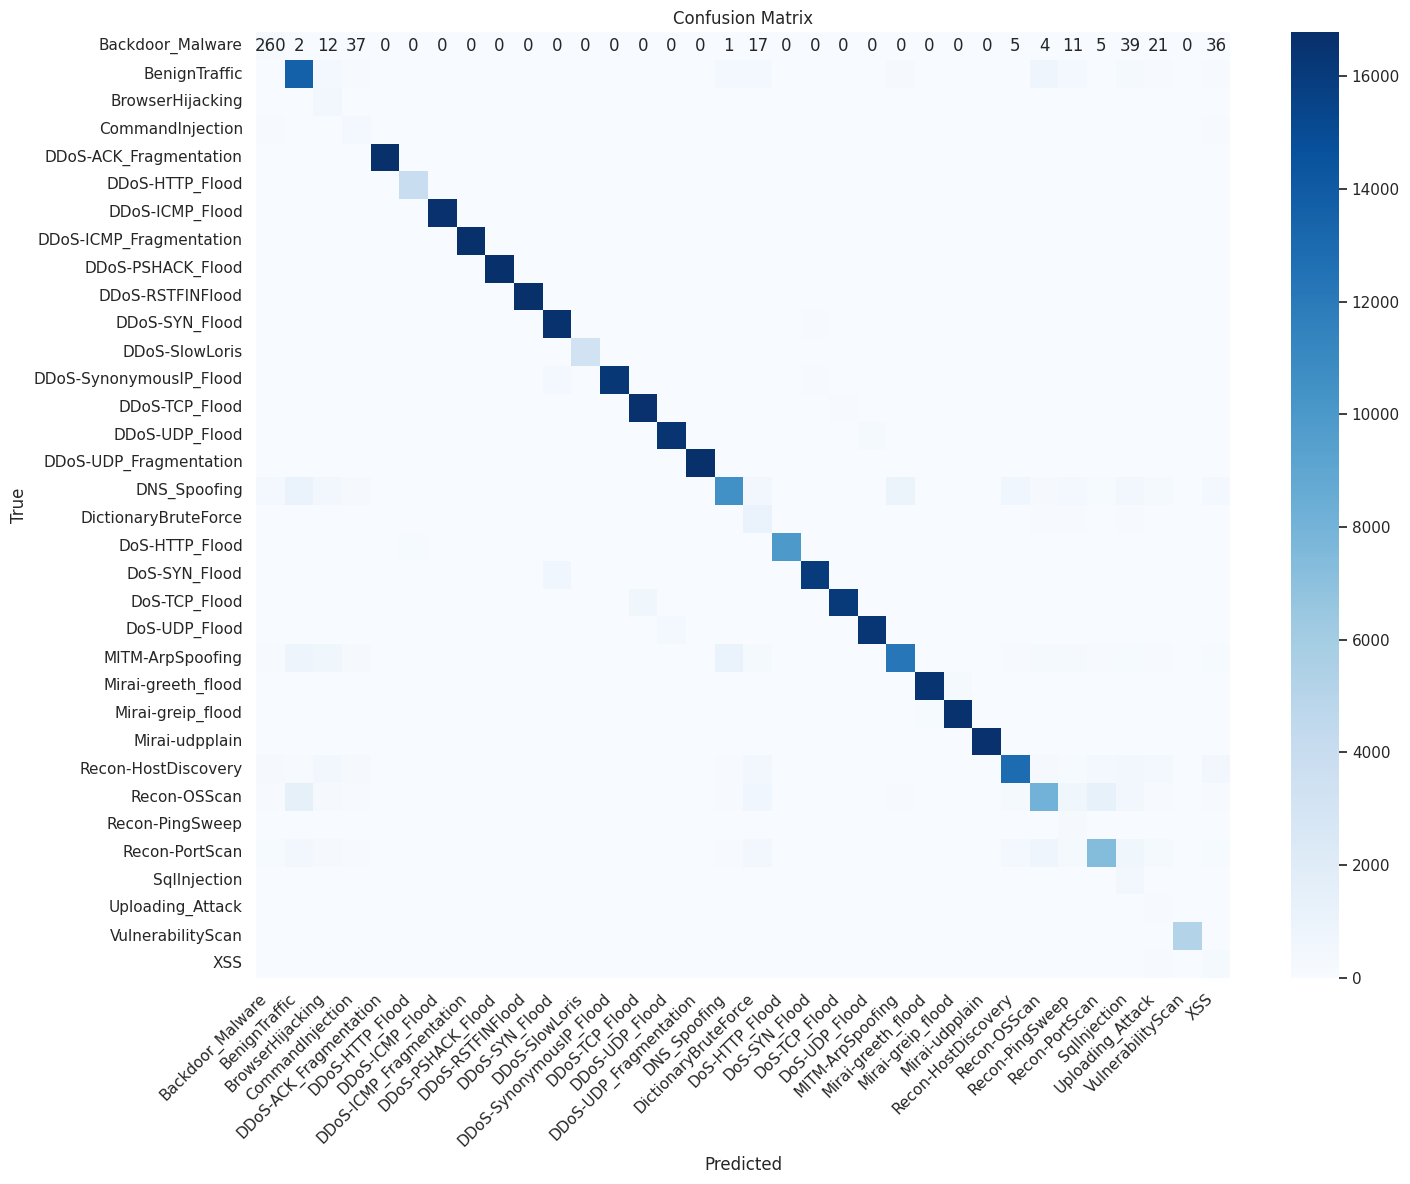


Detailed Classification Report:
--------------------------------------------------
                         precision    recall  f1-score   support

       Backdoor_Malware      0.172     0.578     0.265       450
          BenignTraffic      0.764     0.809     0.786     16817
       BrowserHijacking      0.162     0.620     0.257       827
       CommandInjection      0.265     0.573     0.363       764
 DDoS-ACK_Fragmentation      0.998     0.996     0.997     16803
        DDoS-HTTP_Flood      0.941     0.972     0.956      4067
        DDoS-ICMP_Flood      1.000     0.999     1.000     16708
DDoS-ICMP_Fragmentation      0.999     0.996     0.997     16824
      DDoS-PSHACK_Flood      0.999     0.998     0.999     16807
       DDoS-RSTFINFlood      0.999     0.999     0.999     16785
         DDoS-SYN_Flood      0.939     0.988     0.963     16809
         DDoS-SlowLoris      0.946     0.981     0.963      3314
DDoS-SynonymousIP_Flood      0.995     0.968     0.981     16802
     

In [36]:
X_test = data[test_mask][selected_predictors]
y_test = data[test_mask][col_target]

y_test_pred = model_lgb.predict(X_test)
results = model_evaluation(y_test, y_test_pred, label_encoder)

## Error Analysis

In [75]:
problematic_classes = ['Uploading_Attack', 'Recon-PingSweep']
problematic_class_ids = label_encoder.transform(problematic_classes)

Model has to be trained again because of categorical variables encoding
 


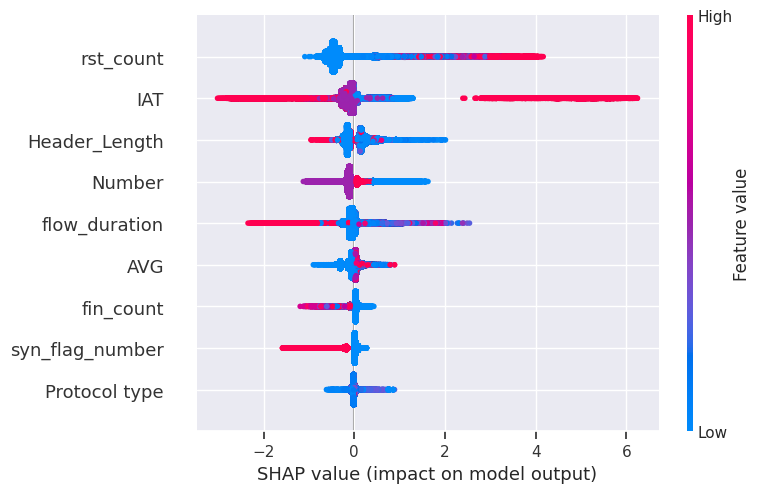

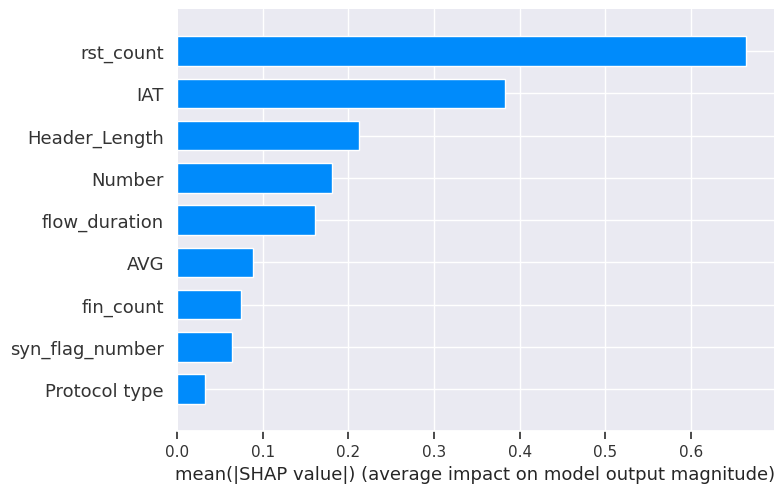

In [43]:
var_imp_shap = model_lgb.print_shap_values(
    data[train_mask][selected_predictors],
    data[valid_mask][selected_predictors],
    data[train_mask][col_target],
    data[valid_mask][col_target],
    set_to_shap=data[test_mask][selected_predictors],
    w_train=data[train_mask][col_weight],
    w_valid=data[valid_mask][col_weight],
)

In [62]:
from typing import Optional, List

In [79]:
def shap_dependence_plot_multiclass(
    model_lgb: lgbm.LGBM_model,
    feature: str,
    classes: Optional[List[str]] = None,
    interaction_feature: Optional[str] = None,
    xmin: Optional[float] = None,
    xmax: Optional[float] = None,
    show_plots: bool = True,
    label_encoder: Optional[object] = None,
    output_folder: Optional[str] = None
) -> None:
    """Generate SHAP dependence plots for specified classes in a multiclass problem.

    Args:
        model_lgb: LGBM_model object containing the model and data
        feature: Feature name to plot
        classes: List of class names (strings). If None, plot all classes
        interaction_feature: Optional feature to show interaction with
        xmin, xmax: Optional axis limits
        show_plots: Whether to display plots
        label_encoder: LabelEncoder object used to encode target classes
        output_folder: Optional path to save plots

    Returns:
        None
    """
    if not hasattr(model_lgb, 'shap_values_') or not hasattr(model_lgb, 'set_to_shap_'):
        raise ValueError("SHAP values have not been computed. Run print_shap_values() first.")

    # Get shape of SHAP values to determine if multiclass
    shap_values = model_lgb.shap_values_
    
    # For multiclass, SHAP values will be a list or have shape (n_classes, n_samples, n_features)
    is_multiclass = isinstance(shap_values, list) or (len(shap_values.shape) == 3)
    
    if not is_multiclass:
        # For binary classification, create a list with two elements
        # First element: negative class (multiply by -1)
        # Second element: positive class
        shap_values = [-shap_values, shap_values]
        if classes is None:
            classes = ['Negative Class', 'Positive Class']
        class_indices = [0, 1]
    else:
        if classes is None:
            if label_encoder is not None:
                classes = label_encoder.classes_
            else:
                n_classes = len(shap_values) if isinstance(shap_values, list) else shap_values.shape[0]
                classes = [f"Class {i}" for i in range(n_classes)]
        
        # Get class indices from label encoder
        if label_encoder is not None:
            class_indices = label_encoder.transform(classes)
        else:
            # If no label encoder, assume sequential indices
            class_indices = list(range(len(classes)))

    # Create subplots for each class
    n_plots = len(classes)
    fig, axes = plt.subplots(n_plots, 1, figsize=(10, 5*n_plots))
    if n_plots == 1:
        axes = [axes]

    # Generate plot for each class
    for idx, (ax, class_name, class_idx) in enumerate(zip(axes, classes, class_indices)):
        plt.sca(ax)
        try:
            if interaction_feature is None:
                shap.dependence_plot(
                    feature, 
                    shap_values[class_idx], 
                    model_lgb.set_to_shap_,
                    xmin=xmin,
                    xmax=xmax,
                    show=False,
                    ax=ax
                )
            else:
                shap.dependence_plot(
                    feature, 
                    shap_values[class_idx], 
                    model_lgb.set_to_shap_,
                    interaction_index=interaction_feature,
                    xmin=xmin,
                    xmax=xmax,
                    show=False,
                    ax=ax
                )
            
            ax.set_title(f'{class_name}')
        except IndexError:
            print(f"Warning: Could not generate plot for class '{class_name}' (index {class_idx})")
            continue

    plt.tight_layout()
    
    if output_folder is not None:
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        plt.savefig(os.path.join(output_folder, f'shap_dependence_multiclass_{feature}.png'), 
                   bbox_inches='tight')
        
    if show_plots:
        plt.show()
    else:
        plt.close()

    # Print category encodings if feature is categorical
    if feature in model_lgb.cols_cat_:
        print(f"\nEncoding of categories for {feature}:")
        labels, uniques = pd.factorize(model_lgb.train_[feature].cat.add_categories("NA").fillna("NA"))
        for j in range(len(np.unique(labels))):
            print(f"{np.unique(labels)[j]}: {uniques[j]}")

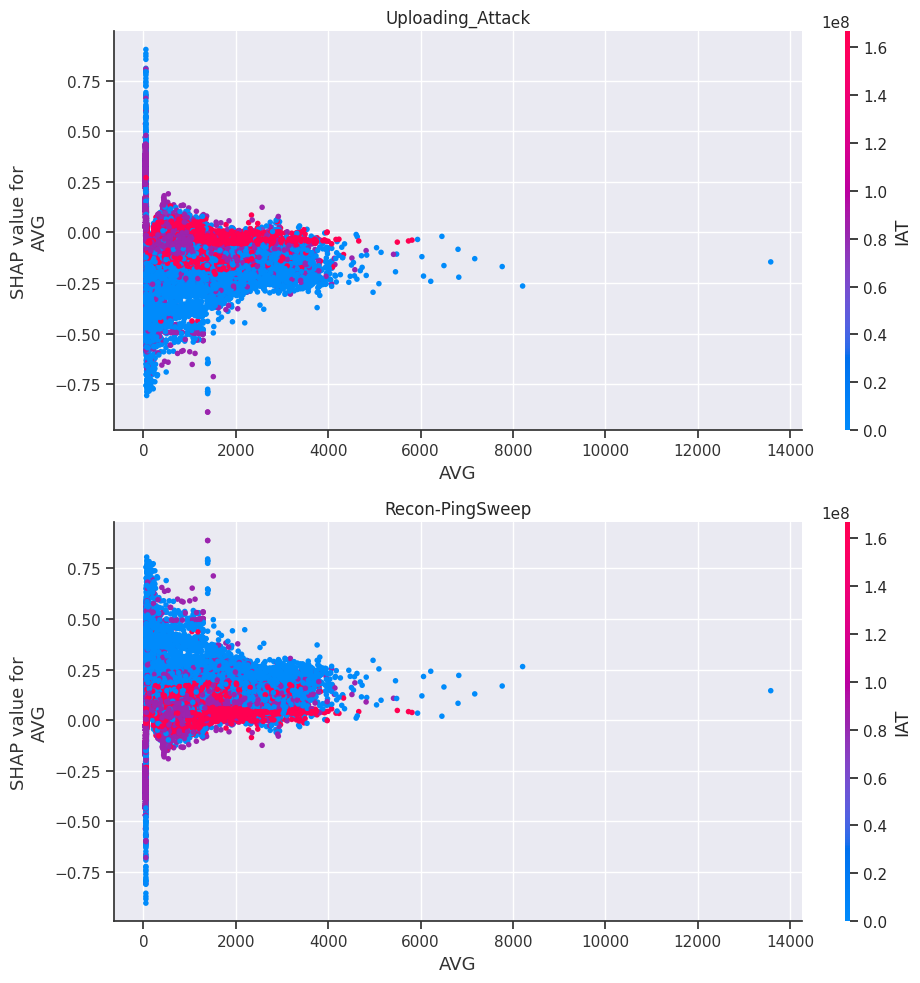

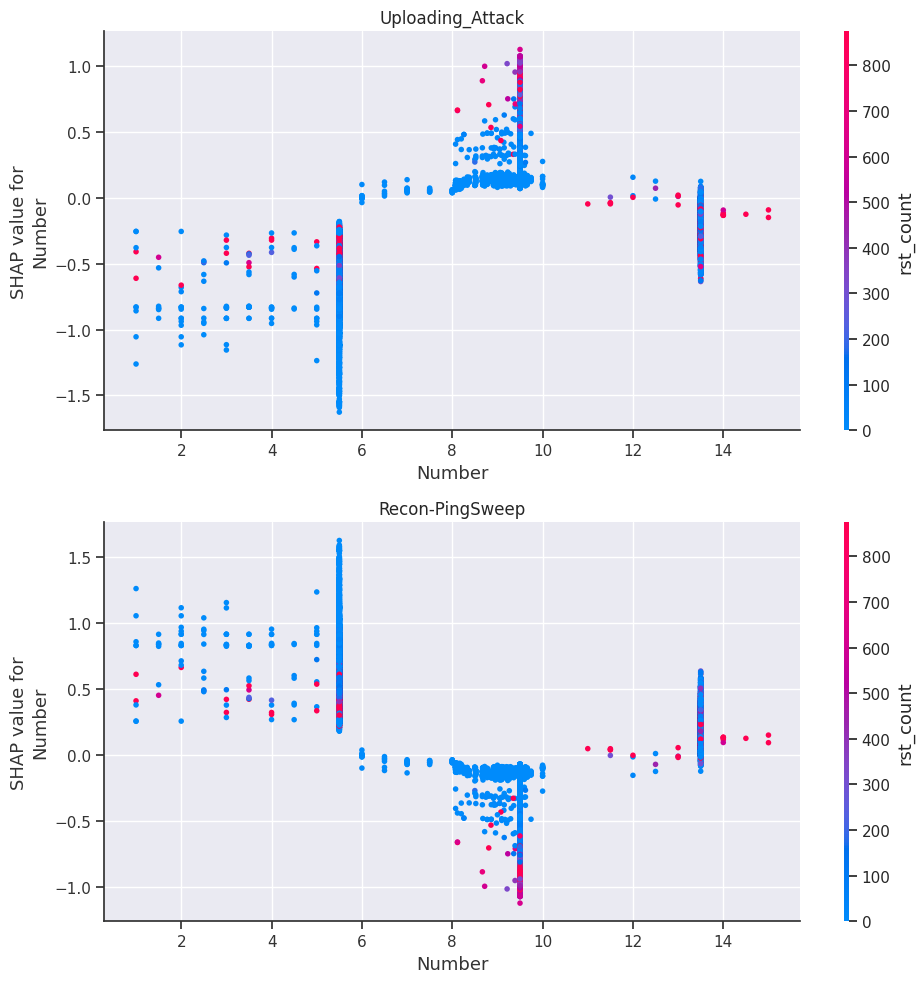

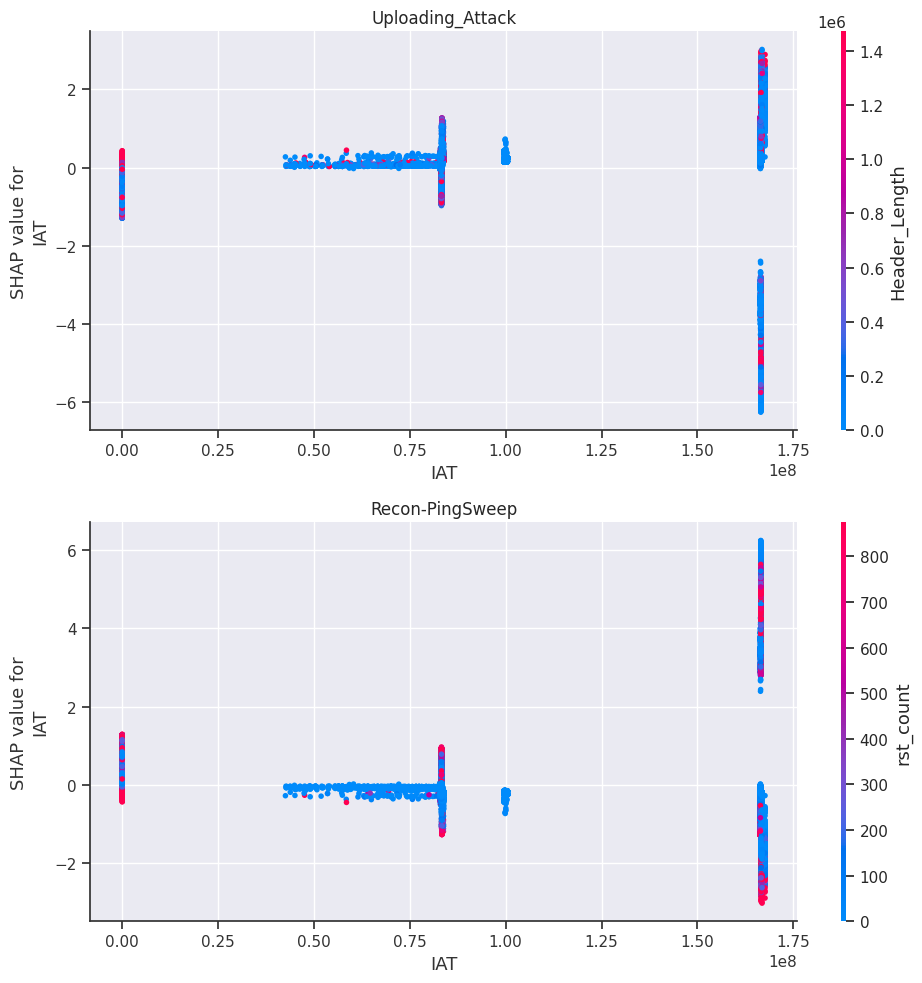

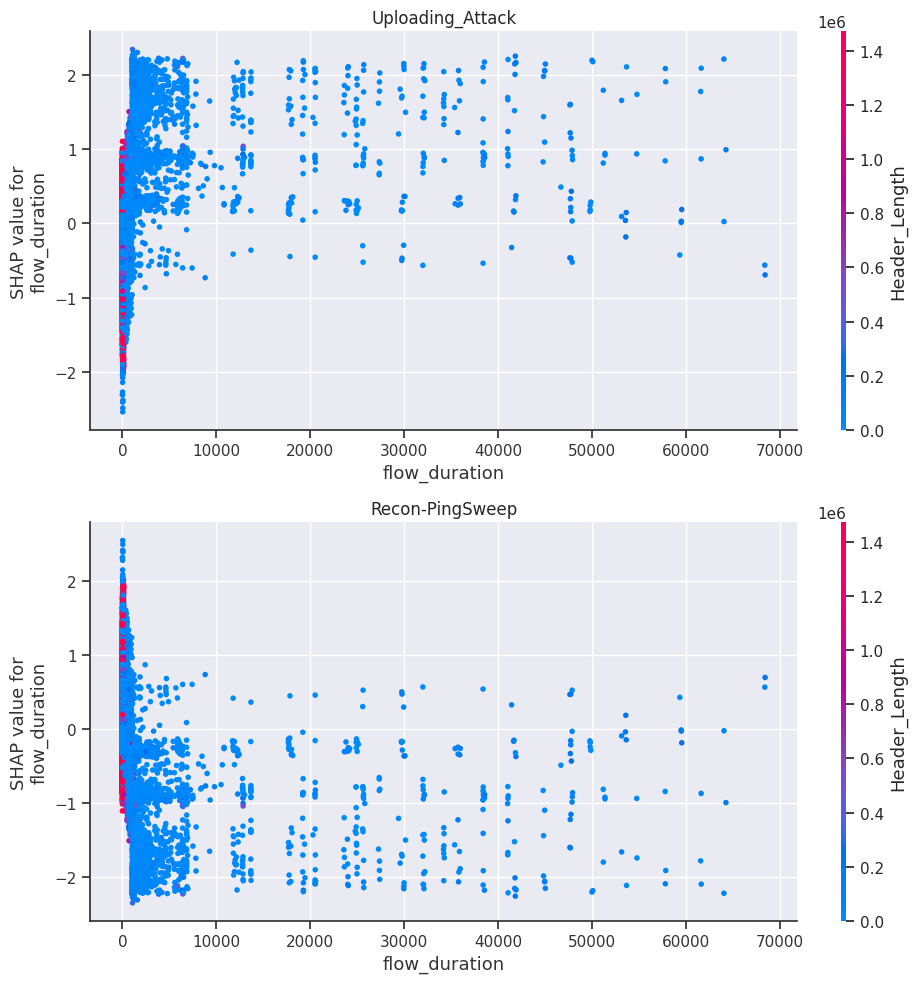

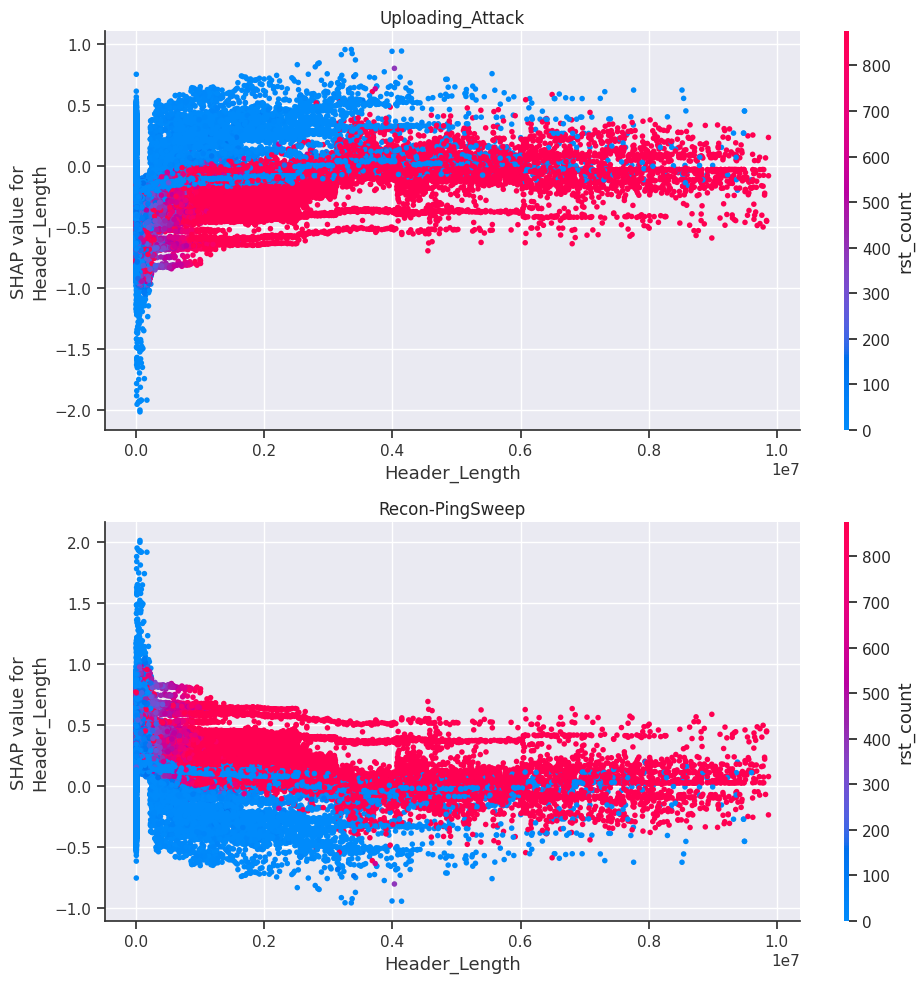

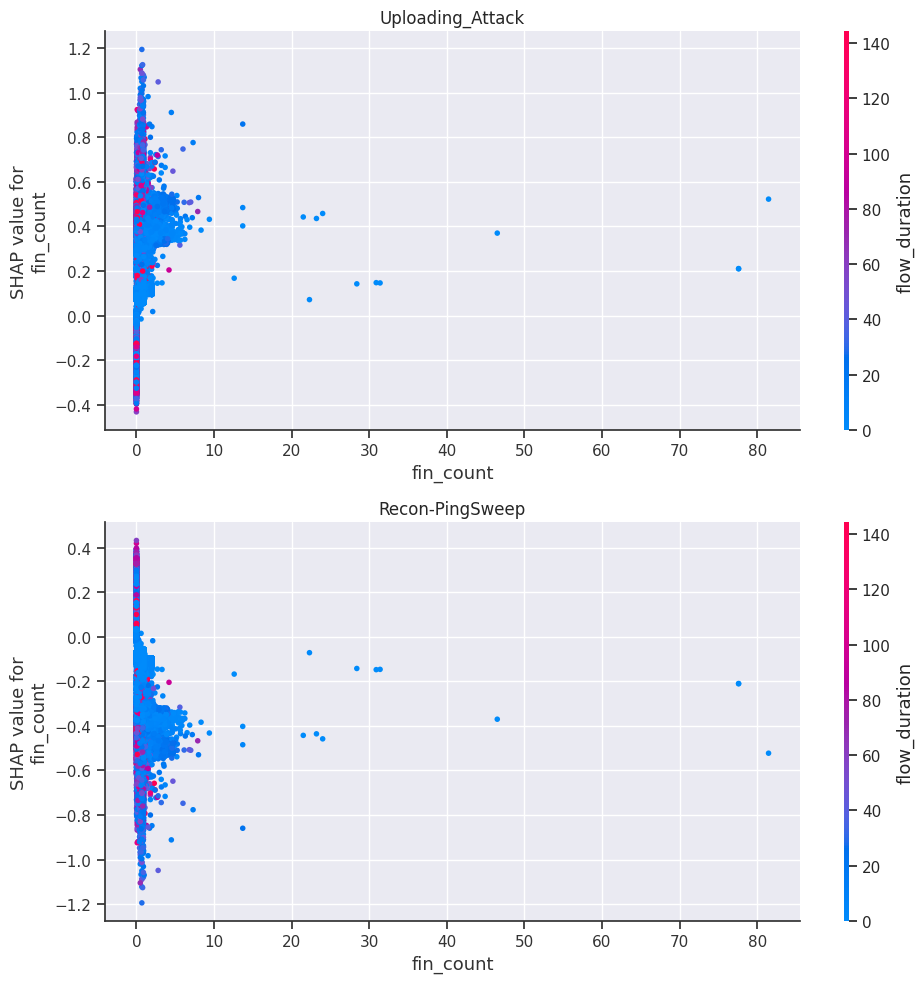

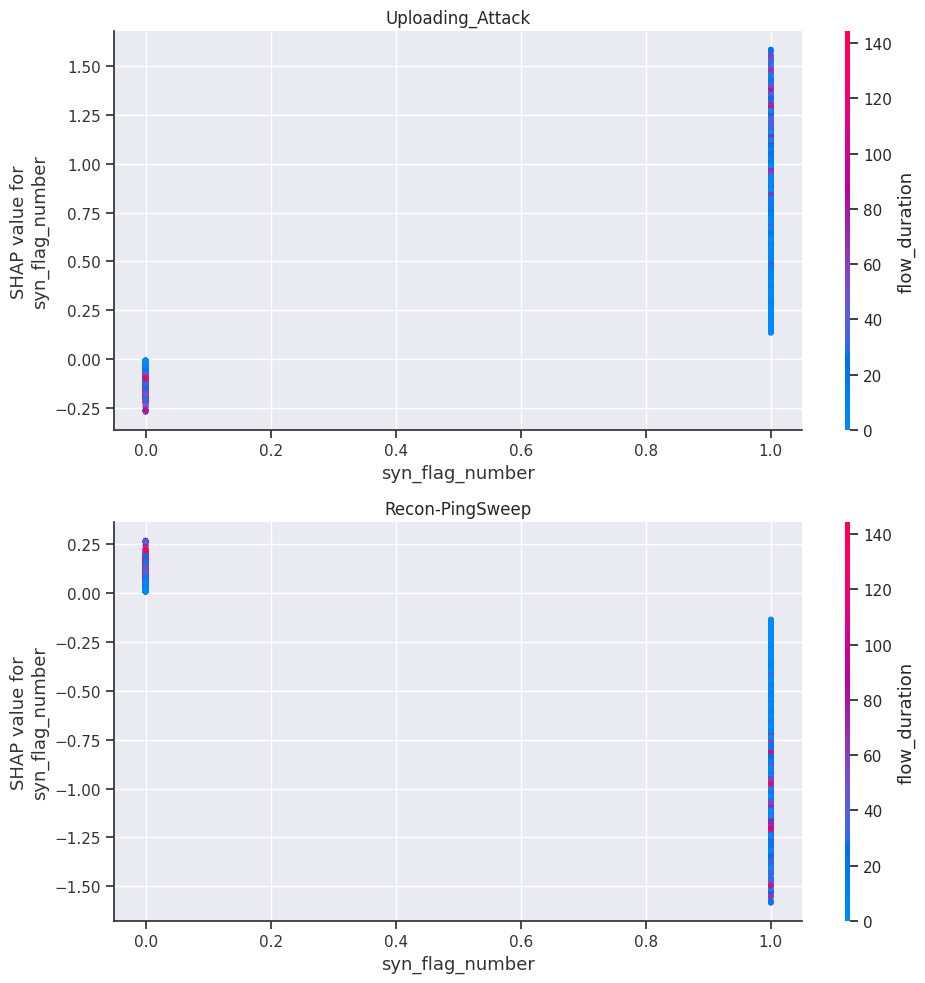

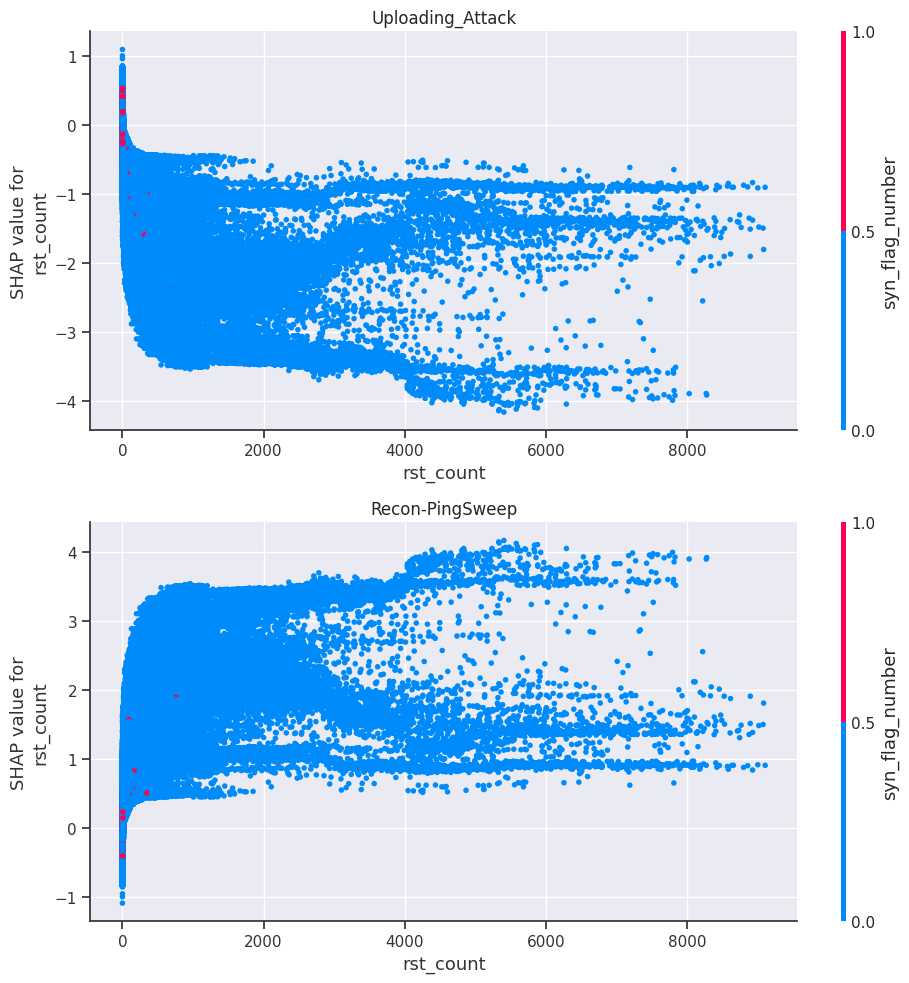

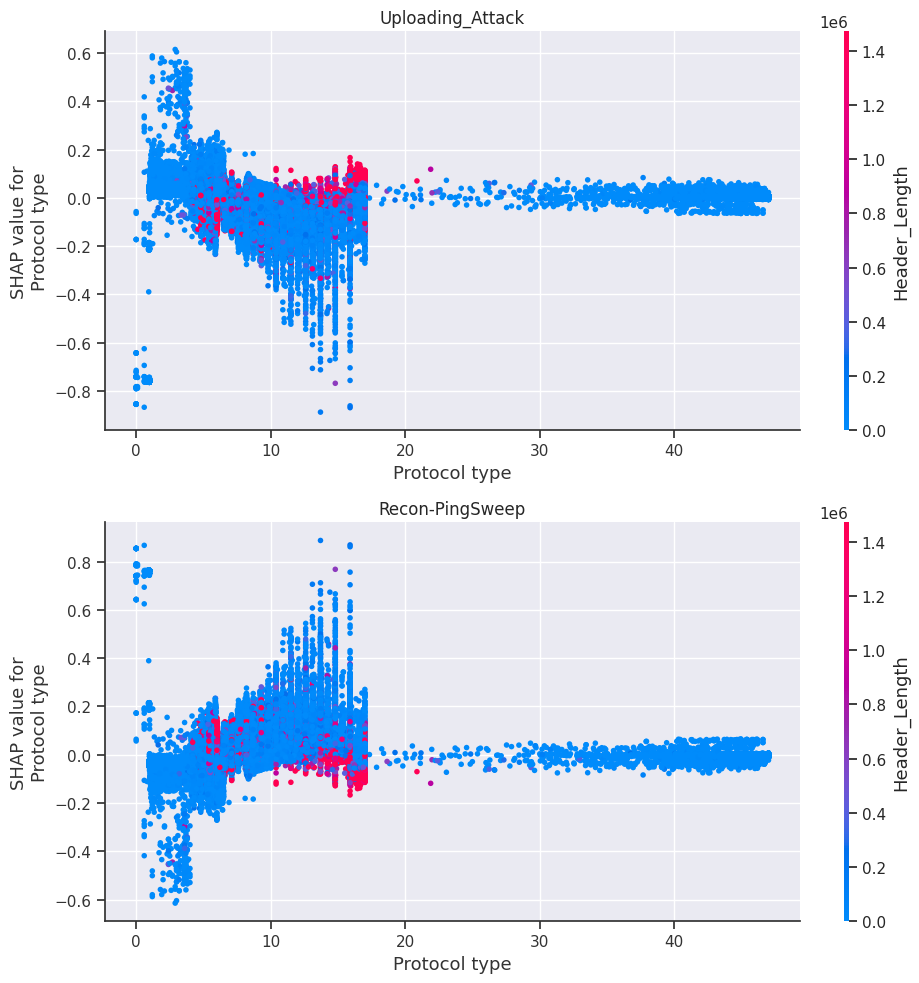

In [80]:
for feat in selected_predictors:
    shap_dependence_plot_multiclass(
        model_lgb=model_lgb,
        feature=feat,
        classes=problematic_classes,
        label_encoder=label_encoder,
        show_plots=True
    )

# AVG Feature Analysis:

1. Uploading_Attack:
- High variance in SHAP values for low AVG values (0-2000)
- SHAP values mostly negative for AVG > 2000
- Model struggles to differentiate Uploading_Attack when AVG is low
- Higher AVG values tend to predict against Uploading_Attack

2. Recon-PingSweep:
- Similar pattern but with positive SHAP values for low AVG (0-2000)
- More scattered positive impact for medium AVG values (2000-6000)
- Model shows uncertainty in low AVG range where most attacks occur
- Color gradient (IAT) shows some correlation but not strong enough for clear separation

# Number feature analysis:

1. Uploading_Attack:
- Strong negative impact (SHAP < -0.5) for Number values 1-6
- Strong positive impact (SHAP > 0) around Number = 10
- Model learns that Uploading attacks tend to have higher Number values

2. Recon-PingSweep:
- Strong positive impact (SHAP > 0.5) for Number values 1-6
- Strong negative impact (SHAP < -0.5) around Number = 10
- Almost perfect mirror image of Uploading_Attack pattern

The Number feature provides good separation between these classes:
- Low Number values (1-6) -> Likely Recon-PingSweep
- High Number values (around 10) →->Likely Uploading_Attack
- This feature appears more discriminative than AVG for these classes

# IAT (Inter-Arrival Time) feature analysis:

1. Uploading_Attack:
- Mostly neutral impact (SHAP ≈ 0) for IAT values between 0.25-1.0e8
- Strong negative impact (SHAP < -4) at very high IAT (~1.75e8)
- Some positive spikes at specific IAT values (1.0e8, 1.6e8)

2. Recon-PingSweep:
- Similar neutral pattern for middle IAT range
- Strong positive impact (SHAP > 4) at very high IAT (~1.75e8)
- Mirror pattern to Uploading_Attack at extreme values

Key insight:
- IAT is mostly non-discriminative in the middle range where most samples occur
- Only extreme IAT values help differentiate between these attacks
- The feature's limited discriminative power in the common range may contribute 
  to model confusion between these classes

# Flow_duration feature analysis:

1. Uploading_Attack:
- High variance in SHAP values (-2 to +2) for very short flows (0-5000)
- Tends toward positive SHAP values (0.5 to 2) for longer durations
- More scattered distribution as duration increases
- Most samples concentrated in short duration range

2. Recon-PingSweep:
- Similar high variance (-2 to +2) for short flows
- Tends toward negative SHAP values (-2 to -0.5) for longer durations
- Mirror pattern compared to Uploading_Attack
- Dense concentration of samples in short duration range

Key Insights:
- Both attacks predominantly occur with short flow durations (0-5000)
- The feature becomes more discriminative for longer flows (>10000):
  * Long duration → More likely Uploading_Attack
  * Long duration → Less likely Recon-PingSweep
- High overlap and variance in the most common range (short flows) 
  makes this feature unreliable for distinguishing between attacks
  in typical cases

# Header_Length feature analysis:

1. Uploading_Attack:
- Extreme negative impact (SHAP < -1.5) for very small header lengths
- Gradual increase in SHAP values as header length increases
- Most samples cluster between -0.5 and 0.5 SHAP values
- High density of samples (red points) showing consistent pattern

2. Recon-PingSweep:
- Strong positive spike (SHAP > 1.5) for very small header lengths
- Stabilizes between -0.5 and 0.5 for larger header lengths
- More scattered distribution compared to Uploading_Attack
- Shows opposite pattern to Uploading_Attack at small header lengths

Key Insights:
- Very small header lengths are strong discriminators:
  * Strongly indicates Recon-PingSweep
  * Strongly against Uploading_Attack
- For larger header lengths (>2e6), the feature becomes less discriminative
- The color intensity (rst_count) suggests additional patterns that might 
  help in classification when combined with other features
- Model confusion likely occurs in the middle range where SHAP values overlap

# Fin_count feature analysis:

1. Uploading_Attack:
- Strong positive impact (SHAP 0.4 to 1.2) for low fin_count (0-10)
- Most samples concentrated in this low range
- Scattered, weaker impact for higher fin_count values
- Color gradient shows some correlation with flow_duration

2. Recon-PingSweep:
- Predominantly negative impact (SHAP -0.2 to -1.2) for low fin_count
- Mirror pattern to Uploading_Attack
- Most samples also concentrated in low fin_count range
- Similar flow_duration correlation pattern

Key Insights:
- Fin_count is most discriminative in the low range (0-10) where most samples occur
- Clear opposing patterns for both attacks:
  * Low fin_count strongly indicates Uploading_Attack
  * Low fin_count strongly against Recon-PingSweep
- The feature provides good separation between classes in the most common range
- This appears to be one of the more reliable features for distinguishing 
  between these attack types

# Syn_flag_number feature analysis:

1. Uploading_Attack:
- Two distinct clusters:
  * Slight negative impact (SHAP ≈ -0.25) at syn_flag_number = 0
  * Strong positive impact (SHAP ≈ 1.5) at syn_flag_number = 1
- Almost binary pattern with no middle values

2. Recon-PingSweep:
- Also shows two distinct clusters:
  * Slight positive impact (SHAP ≈ 0.25) at syn_flag_number = 0
  * Strong negative impact (SHAP ≈ -1.5) at syn_flag_number = 1
- Mirror pattern to Uploading_Attack

Key Insights:
- Syn_flag_number is a binary feature (0 or 1)
- Very clear discriminative pattern:
  * syn_flag_number = 1 strongly indicates Uploading_Attack
  * syn_flag_number = 1 strongly against Recon-PingSweep
- The feature provides excellent separation between classes
- Flow_duration (color) doesn't seem to add significant additional information
- This appears to be one of the strongest individual predictors for 
  distinguishing between these attack types

# Rst_count feature analysis:

1. Uploading_Attack:
- Initial spike of positive values at very low rst_count
- Quickly transitions to negative impact
- Forms three distinct bands of impact:
  * Light negative (SHAP ≈ -1)
  * Medium negative (SHAP ≈ -2)
  * Strong negative (SHAP ≈ -3 to -4)
- Impact becomes more negative as rst_count increases

2. Recon-PingSweep:
- Initial negative spike at very low rst_count
- Quickly transitions to positive impact
- Also shows banded pattern:
  * Low positive (SHAP ≈ 1)
  * Medium positive (SHAP ≈ 2)
  * Strong positive (SHAP ≈ 3 to 4)
- Impact becomes more positive as rst_count increases

Key Insights:
- Almost perfect mirror pattern between the two attack types
- Strong discriminative power, especially at higher rst_count values
- Multiple distinct bands suggest interaction with other features
- Syn_flag_number (color) doesn't show strong correlation with the banding pattern
- Very reliable feature for classification, particularly when rst_count > 2000

# Protocol_type feature analysis:

1. Uploading_Attack:
- Most significant impacts in range 0-20:
  * Positive spike (SHAP ≈ 0.4-0.6) at very low protocol types
  * Negative dip (SHAP ≈ -0.6 to -0.8) around protocol type 15
- Stabilizes to neutral impact (SHAP ≈ 0) for protocol types > 20
- Shows some correlation with Header_Length (color gradient)

2. Recon-PingSweep:
- Also most active in range 0-20:
  * Initial negative spike (SHAP ≈ -0.6) at very low protocol types
  * Positive peak (SHAP ≈ 0.8) around protocol type 15
- Similar stabilization to neutral for protocol types > 20
- Similar Header_Length correlation pattern

Key Insights:
- Protocol types 0-20 are most discriminative
- Almost mirror patterns between attack types in this range
- Higher protocol types (>20) provide little discriminative value
- The feature shows some interaction with Header_Length
- Moderate discriminative power, but mainly in specific protocol ranges
- Model might struggle when both attacks use same protocol types in 
  the neutral range

In [86]:
with open('final_project/model/lightgbm_model.pkl', 'wb') as f:
    pickle.dump(model_lgb, f)

# Save feature list
with open('final_project/model/features.pkl', 'wb') as f:
    pickle.dump(selected_predictors, f)

# Save label encoder if you used one
with open('final_project/model/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [88]:
import pickle

def load_model_components():
    """Load the saved model and components"""
    with open('final_project/model/lightgbm_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    with open('final_project/model/features.pkl', 'rb') as f:
        features = pickle.load(f)
    
    with open('final_project/model/label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)
    
    return model, features, label_encoder

def predict(data_path):
    """
    Make predictions on new data
    
    Args:
        data_path: Path to CSV file containing data to predict
    
    Returns:
        DataFrame with original data and predictions
    """
    # Load model components
    model, features, label_encoder = load_model_components()
    
    # Read and prepare data
    data = pd.read_csv(data_path)
    X = data[features]
    
    # Make predictions
    predictions_numeric = model.predict(X)
    
    # Convert predictions to original classes
    predictions = label_encoder.inverse_transform(predictions_numeric)
    
    # Add predictions to dataframe
    data['Label'] = predictions
    
    return data

In [89]:
data_path = "final_project/data/test.csv"
predictions = predict(data_path)

In [92]:
predictions.to_csv('final_project/data/predictions.csv', index=False)